In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('IPEDS_data.csv')

In [8]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [15]:
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].value_counts())
    print('-----------------------------')

Name
Westminster College                              3
Union College                                    3
Columbia College                                 2
University of St Thomas                          2
Bethel University                                2
                                                ..
University of Maryland-College Park              1
University of Maryland-Baltimore County          1
University of Maryland-University College        1
Loyola University Maryland                       1
Polytechnic University of Puerto Rico-Orlando    1
Name: Name, Length: 1517, dtype: int64
-----------------------------
ZIP code
5401          2
10027         2
10010         2
46556         2
24541         2
             ..
21853-1299    1
20742         1
21250         1
20783-8010    1
32825         1
Name: ZIP code, Length: 1513, dtype: int64
-----------------------------
Highest degree offered
Master's degree                                                     587
Doctor's deg

### Selecting only the relevant columns to our problem based on the questions that we want to answer

In [12]:
relevant_data = ['Name','Highest degree offered','Applicants total','Admissions total','Enrolled total','Percent admitted - total','Admissions yield - total','Tuition and fees, 2010-11','Tuition and fees, 2011-12','Tuition and fees, 2012-13','Tuition and fees, 2013-14','Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14','State abbreviation','Control of institution','Total  enrollment','Percent of freshmen receiving any financial aid']

In [16]:
relevant_df = df[relevant_data]
relevant_df

,Name,Highest degree offered,Applicants total,Admissions total,Enrolled total,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Total enrollment,Percent of freshmen receiving any financial aid
0,Alabama A & M University,Doctor's degree - research/scholarship,6142.0,5521.0,1104.0,90.0,20.0,5800.0,6828.0,7182.0,7182.0,21849.0,27441.0,Alabama,Public,5020.0,97.0
1,University of Alabama at Birmingham,Doctor's degree - research/scholarship and pro...,5689.0,4934.0,1773.0,87.0,36.0,5806.0,6264.0,6798.0,7206.0,22495.0,31687.0,Alabama,Public,18568.0,90.0
2,Amridge University,Doctor's degree - research/scholarship and pro...,NaN,NaN,NaN,NaN,NaN,8360.0,8720.0,6800.0,6870.0,NaN,NaN,Alabama,Private not-for-profit,631.0,100.0
3,University of Alabama in Huntsville,Doctor's degree - research/scholarship and pro...,2054.0,1656.0,651.0,81.0,39.0,7492.0,8094.0,8794.0,9192.0,23466.0,35780.0,Alabama,Public,7376.0,87.0
4,Alabama State University,Doctor's degree - research/scholarship and pro...,10245.0,5251.0,1479.0,51.0,28.0,7164.0,8082.0,7932.0,8720.0,18286.0,25222.0,Alabama,Public,6075.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,Master's degree,393.0,136.0,86.0,35.0,63.0,NaN,NaN,NaN,5587.0,NaN,NaN,Florida,Public,1877.0,NaN
1530,The Kingâ€™s College,Bachelor's degree,3033.0,2158.0,127.0,71.0,6.0,27350.0,29240.0,29240.0,31300.0,48717.0,48717.0,New York,Private not-for-profit,516.0,100.0
1531,Ottawa University-Online,Master's degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kansas,Private not-for-profit,458.0,NaN
1532,Providence Christian College,Bachelor's degree,122.0,65.0,20.0,53.0,31.0,20444.0,21444.0,22686.0,24222.0,38602.0,38602.0,California,Private not-for-profit,66.0,100.0


In [20]:
relevant_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   Highest degree offered                                          1534 non-null   object 
 2   Applicants total                                                1377 non-null   float64
 3   Admissions total                                                1377 non-null   float64
 4   Enrolled total                                                  1377 non-null   float64
 5   Percent admitted - total                                        1376 non-null   float64
 6   Admissions yield - total                                        1376 non-null   float64
 7   Tuition and fees, 2010-11                          

#### Some universities had lots of Null values for some crucial data like the total number of applicants so we're going to remove these data samples.

In [21]:
relevant_df = relevant_df[relevant_df['Applicants total'].notna()]

In [22]:
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1532
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1377 non-null   object 
 1   Highest degree offered                                          1377 non-null   object 
 2   Applicants total                                                1377 non-null   float64
 3   Admissions total                                                1377 non-null   float64
 4   Enrolled total                                                  1377 non-null   float64
 5   Percent admitted - total                                        1376 non-null   float64
 6   Admissions yield - total                                        1376 non-null   float64
 7   Tuition and fees, 2010-11                          

In [29]:
sorted_applicants = relevant_df.sort_values(by = ['Applicants total'], ascending = False)
top_50 = sorted_applicants.head(50)
top_50

,Name,Highest degree offered,Applicants total,Admissions total,Enrolled total,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Total enrollment,Percent of freshmen receiving any financial aid
84,University of California-Los Angeles,Doctor's degree - research/scholarship and pro...,72676.0,15981.0,5620.0,22.0,35.0,10781.0,12686.0,12692.0,12697.0,32416.0,55294.0,California,Public,40795.0,62.0
81,University of California-Berkeley,Doctor's degree - research/scholarship and pro...,61717.0,11108.0,4162.0,18.0,37.0,10940.0,12834.0,12874.0,12864.0,33319.0,56197.0,California,Public,36198.0,69.0
86,University of California-San Diego,Doctor's degree - research/scholarship and pro...,60832.0,22812.0,4575.0,38.0,20.0,11306.0,13200.0,13217.0,13271.0,30470.0,53348.0,California,Public,29517.0,62.0
841,New York University,Doctor's degree - research/scholarship and pro...,57845.0,15066.0,5207.0,26.0,35.0,40082.0,41606.0,43204.0,44848.0,63540.0,63540.0,New York,Private not-for-profit,44599.0,55.0
83,University of California-Irvine,Doctor's degree - research/scholarship and pro...,56515.0,23956.0,5077.0,42.0,21.0,11232.0,13122.0,13122.0,13149.0,30504.0,53382.0,California,Public,28895.0,77.0
87,University of California-Santa Barbara,Doctor's degree - research/scholarship,55258.0,24556.0,4741.0,44.0,19.0,11686.0,13595.0,13671.0,13746.0,34051.0,56929.0,California,Public,22225.0,70.0
77,California State University-Long Beach,Doctor's degree - other,55019.0,16956.0,4276.0,31.0,25.0,4810.0,6240.0,6052.0,6240.0,22106.0,33266.0,California,Public,35586.0,71.0
863,St John's University-New York,Doctor's degree - research/scholarship and pro...,51634.0,27449.0,2792.0,53.0,10.0,31980.0,33875.0,35520.0,37260.0,56971.0,56971.0,New York,Private not-for-profit,20729.0,98.0
126,San Diego State University,Doctor's degree - other,51163.0,15970.0,4139.0,31.0,26.0,5206.0,6578.0,6578.0,6766.0,25068.0,36228.0,California,Public,31899.0,62.0
82,University of California-Davis,Doctor's degree - research/scholarship and pro...,49820.0,22526.0,5208.0,45.0,23.0,11958.0,13860.0,13877.0,13895.0,33066.0,55944.0,California,Public,33307.0,77.0


## Q1: Does the number of applicants reflect the most preferred universities for students?

#### Plotting the 15 most applied to Universities in USA

Text(0.5, 1.0, 'Top 15 most applied to universities')

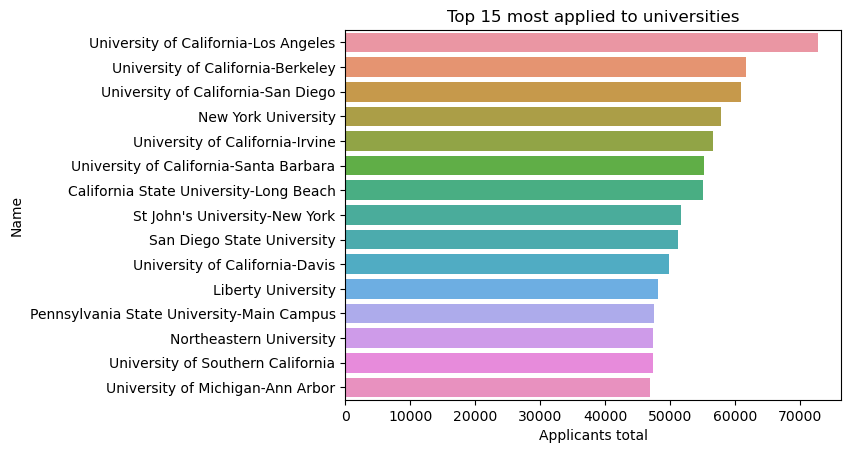

In [33]:
sns.barplot(data=top_50.head(15), x='Applicants total', y='Name')
plt.title('Top 15 most applied to universities')

#### California and New York having almost 50% of the universities in the top 50 shows that population plays a big part in the total number of applicants.

<AxesSubplot:xlabel='Count', ylabel='State abbreviation'>

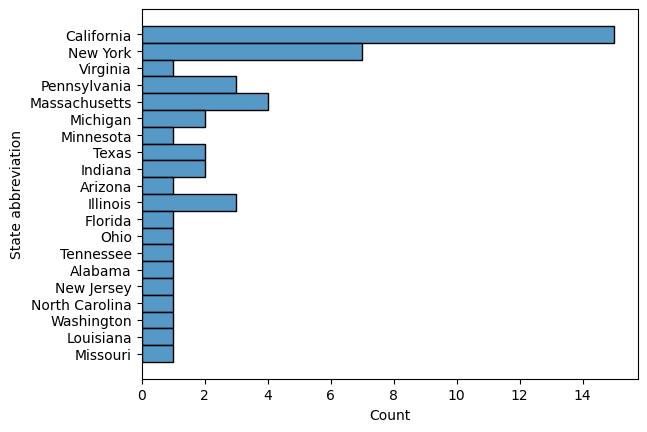

In [40]:
sns.histplot(data=top_50, y = 'State abbreviation')

#### The feature that most closely answers the question of which university is prefered by the students is the percentage of accepted students that actually enroll in the university, which is shown in the (Admissions yield - total) column.

In [55]:
preferred = relevant_df.sort_values(by = ['Admissions yield - total'], ascending = False)

Text(0.5, 1.0, '25 Most preferred universities')

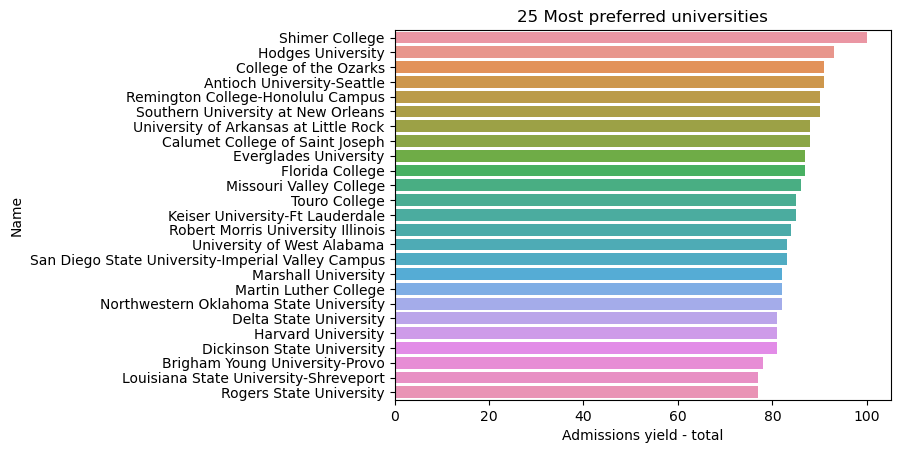

In [56]:
sns.barplot(data=preferred.head(25), x='Admissions yield - total', y='Name')
plt.title('25 Most preferred universities')

## Q2: Do students prefer universities where they're more likely to be admitted?

<AxesSubplot:xlabel='Admissions yield - total', ylabel='Percent admitted - total'>

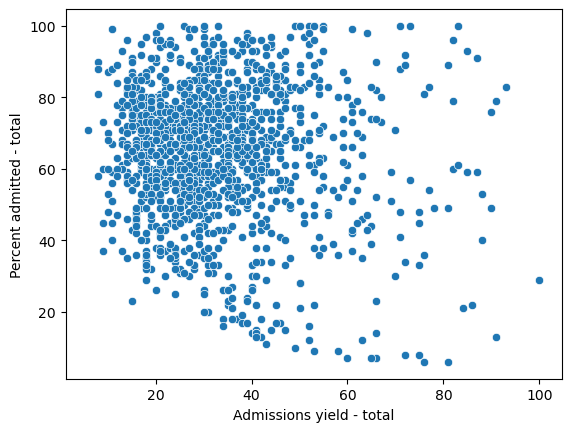

In [58]:
sns.scatterplot(data=relevant_df, x='Admissions yield - total', y='Percent admitted - total')

#### The previous plot shows that the preferred universities generally have lower admittance rates.

## Q3: Do students prefer public or private universities?

<AxesSubplot:xlabel='Control of institution', ylabel='Admissions yield - total'>

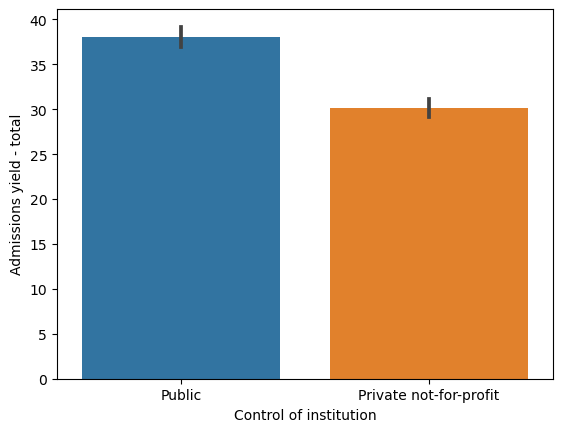

In [60]:
sns.barplot(data=relevant_df, x='Control of institution', y='Admissions yield - total')

#### Students' preference is generally close between public and private universities. Although public universities have a slightly higher enrollment rate which could be due to the fact that they are more affordable than private universities, which we can see clearly in the next plot.

## Q4: Do students prefer universities with low tuition fees?

#### We'll use the latest tuition and fees data available which is from the year 2013-2014

<AxesSubplot:xlabel='Tuition and fees, 2013-14', ylabel='Admissions yield - total'>

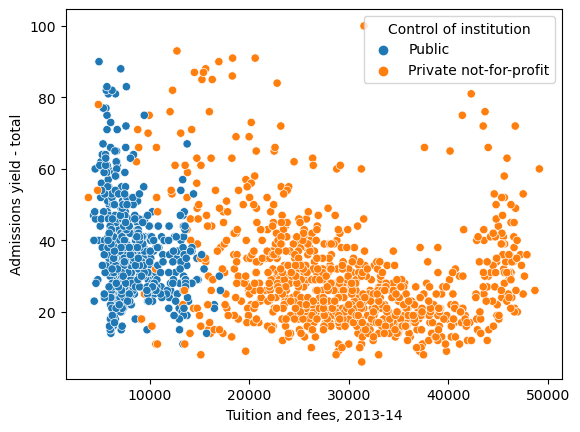

In [69]:
sns.scatterplot(data=relevant_df, y='Admissions yield - total', x='Tuition and fees, 2013-14', hue='Control of institution')

#### The plot shows generally no correlation between tuition and fees and admissions yield. The plot also shows that private universities tend to be more expensive than the public ones.

## Q5: Do students prefer universities with low on-campus living cost?

<AxesSubplot:xlabel='Total price for in-state students living on campus 2013-14', ylabel='Admissions yield - total'>

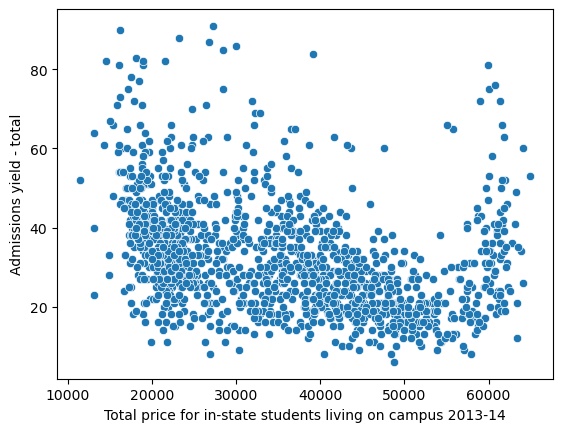

In [64]:
sns.scatterplot(data=relevant_df, y='Admissions yield - total', x='Total price for in-state students living on campus 2013-14')

<AxesSubplot:xlabel='Total price for in-state students living on campus 2013-14', ylabel='Admissions yield - total'>

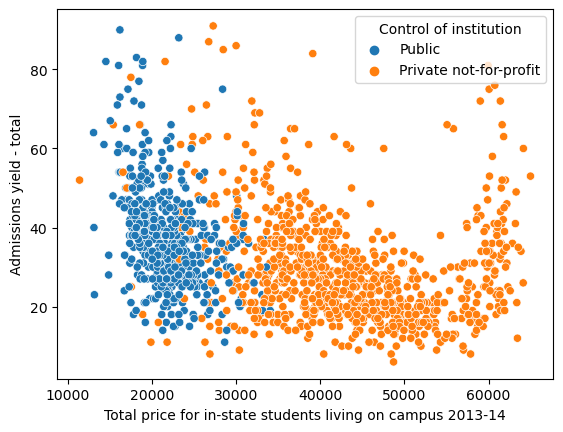

In [67]:
sns.scatterplot(data=relevant_df, y='Admissions yield - total', x='Total price for in-state students living on campus 2013-14', hue='Control of institution')

#### The tendency of private universities being more expensive continues which makes sense.

<AxesSubplot:xlabel='Total price for out-of-state students living on campus 2013-14', ylabel='Admissions yield - total'>

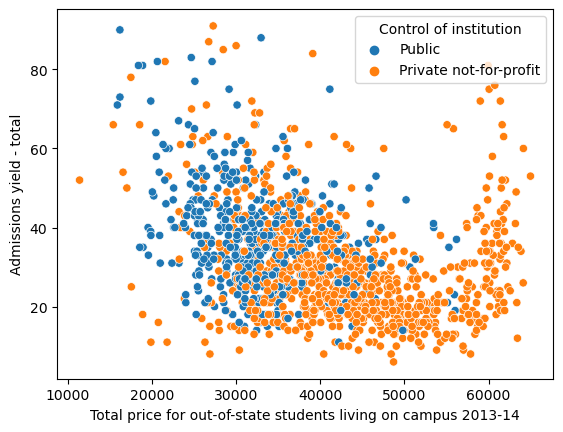

In [70]:
sns.scatterplot(data=relevant_df, y='Admissions yield - total', x='Total price for out-of-state students living on campus 2013-14', hue='Control of institution')

#### It's obvious that there's generally no correlation between preferred universities and cost of living on campus.
#### The last plot also shows how for out of state students the living costs is almost similar in public and private universities unlike for in state students. That also makes sense because it shows how public universities in the students' home state are usually cheaper because of state tuition which is offered by public universities for the state residents.

## Q6: Do students prefer universities from highly populated states?

#### We'll import a list of US states by population from wikipedia as we don't have a population feature in the original dataset.

In [72]:
population = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population')[0]
population

Rank                  State or territory Census population[8][a]  \
    2022  2020            State or territory     July 1, 2022 (est.)   
0    1.0   1.0                    California              39029342.0   
1    2.0   2.0                         Texas              30029572.0   
2    3.0   3.0                       Florida              22244823.0   
3    4.0   4.0                      New York              19677151.0   
4    5.0   5.0                  Pennsylvania              12972008.0   
5    6.0   6.0                      Illinois              12582032.0   
6    7.0   7.0                          Ohio              11756058.0   
7    8.0   8.0                       Georgia              10912876.0   
8    9.0   9.0                North Carolina              10698973.0   
9   10.0  10.0                      Michigan              10034113.0   
10  11.0  11.0                    New Jersey               9261699.0   
11  12.0  12.0                      Virginia               8683619.0   
12  13.0  13.0                    Washington               7785786.0   
13  14.0  14.0                       Arizona               7359197.0   
14  15.0  16.0                     Tennessee               7051339.0   
15  16.0  15.0                 Massachusetts               6981974.0   
16  17.0  17.0                       Indiana               6833037.0   
17  18.0  19.0                      Missouri               6177957.0   
18  19.0  18.0                      Maryland               6164660.0   
19  20.0  20.0                     Wisconsin               5892539.0   
20  21.0  21.0                      Colorado               5839926.0   
21  22.0  22.0                     Minnesota               5717184.0   
22  23.0  23.0                South Carolina               5282634.0   
23  24.0  24.0                       Alabama               5074296.0   
24  25.0  25.0                     Louisiana               4590241.0   
25  26.0  26.0                      Kentucky               4512310.0   
26  27.0  27.0                        Oregon               4240137.0   
27  28.0  28.0                      Oklahoma               4019800.0   
28  29.0  29.0                   Connecticut               3626205.0   
29  30.0  31.0                          Utah               3380800.0   
30  31.0  30.0                   Puerto Rico               3221789.0   
31  32.0  32.0                          Iowa               3200517.0   
32  33.0  33.0                        Nevada               3177772.0   
33  34.0  34.0                      Arkansas               3045637.0   
34  35.0  35.0                   Mississippi               2940057.0   
35  36.0  36.0                        Kansas               2937150.0   
36  37.0  37.0                    New Mexico               2113344.0   
37  38.0  38.0                      Nebraska               1967923.0   
38  39.0  39.0                         Idaho               1939033.0   
39  40.0  40.0                 West Virginia               1775156.0   
40  41.0  41.0                        Hawaii               1440196.0   
41  42.0  42.0                 New Hampshire               1395231.0   
42  43.0  43.0                         Maine               1385340.0   
43  44.0  45.0                       Montana               1122867.0   
44  45.0  44.0                  Rhode Island               1093734.0   
45  46.0  46.0                      Delaware               1018396.0   
46  47.0  47.0                  South Dakota                909824.0   
47  48.0  48.0                  North Dakota                779261.0   
48  49.0  49.0                        Alaska                733583.0   
49  50.0  50.0          District of Columbia                671803.0   
50  51.0  51.0                       Vermont                647064.0   
51  52.0  52.0                       Wyoming                581381.0   
52  53.0  53.0                      Guam[10]                     NaN   
53  54.0  54.0       U.S. Virgin Islands[11]

In [83]:
population = population.iloc[:,2:4]

In [84]:
population.columns

MultiIndex([(     'State or territory',  'State or territory'),
            ('Census population[8][a]', 'July 1, 2022 (est.)')],
           )

In [103]:
population.columns = ['State','Population']
population = population[0:52]
population

,State,Population
0,California,39029342.0
1,Texas,30029572.0
2,Florida,22244823.0
3,New York,19677151.0
4,Pennsylvania,12972008.0
5,Illinois,12582032.0
6,Ohio,11756058.0
7,Georgia,10912876.0
8,North Carolina,10698973.0
9,Michigan,10034113.0


Text(0.5, 1.0, 'Most Populated US States')

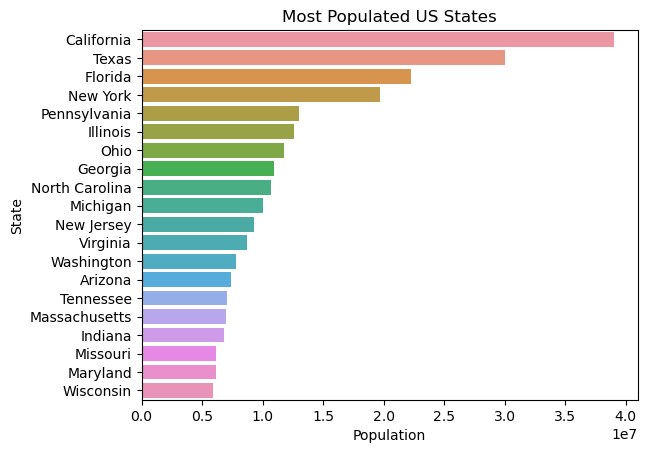

In [106]:
sns.barplot(data=population.head(20),y='State',x='Population')
plt.title('Most Populated US States')

#### We join population and the original dataframe into a new one using pandas merge function.

In [94]:
with_population = pd.merge(relevant_df, population, on='State abbreviation', how='inner')
with_population

,Name,Highest degree offered,Applicants total,Admissions total,Enrolled total,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Total enrollment,Percent of freshmen receiving any financial aid,Population
0,Alabama A & M University,Doctor's degree - research/scholarship,6142.0,5521.0,1104.0,90.0,20.0,5800.0,6828.0,7182.0,7182.0,21849.0,27441.0,Alabama,Public,5020.0,97.0,5074296.0
1,University of Alabama at Birmingham,Doctor's degree - research/scholarship and pro...,5689.0,4934.0,1773.0,87.0,36.0,5806.0,6264.0,6798.0,7206.0,22495.0,31687.0,Alabama,Public,18568.0,90.0,5074296.0
2,University of Alabama in Huntsville,Doctor's degree - research/scholarship and pro...,2054.0,1656.0,651.0,81.0,39.0,7492.0,8094.0,8794.0,9192.0,23466.0,35780.0,Alabama,Public,7376.0,87.0,5074296.0
3,Alabama State University,Doctor's degree - research/scholarship and pro...,10245.0,5251.0,1479.0,51.0,28.0,7164.0,8082.0,7932.0,8720.0,18286.0,25222.0,Alabama,Public,6075.0,93.0,5074296.0
4,The University of Alabama,Doctor's degree - research/scholarship and pro...,30975.0,17515.0,6454.0,57.0,37.0,7900.0,8600.0,9200.0,9450.0,27000.0,41500.0,Alabama,Public,34752.0,75.0,5074296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,University of Wisconsin-Milwaukee,Doctor's degree - research/scholarship and pro...,8944.0,7699.0,3492.0,86.0,45.0,8151.0,8675.0,9181.0,9300.0,22142.0,31871.0,Wisconsin,Public,27416.0,81.0,5892539.0
1373,University of Wisconsin-Platteville,Master's degree,3399.0,3279.0,1754.0,96.0,53.0,6772.0,7113.0,7457.0,7484.0,17684.0,25257.0,Wisconsin,Public,8712.0,86.0,5892539.0
1374,University of Wisconsin-River Falls,Master's degree,2602.0,2254.0,1119.0,87.0,50.0,6894.0,7277.0,7700.0,7720.0,17678.0,25251.0,Wisconsin,Public,6160.0,84.0,5892539.0
1375,University of Wisconsin-Stevens Point,Doctor's degree - professional practice,4432.0,3672.0,1637.0,83.0,45.0,6845.0,7146.0,7505.0,7577.0,16716.0,24289.0,Wisconsin,Public,9661.0,84.0,5892539.0


<AxesSubplot:xlabel='Count', ylabel='State abbreviation'>

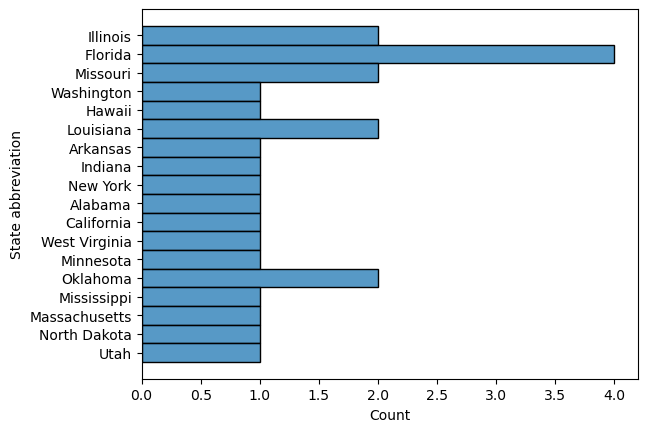

In [109]:
sns.histplot(data=preferred.head(25), y = 'State abbreviation')

<AxesSubplot:xlabel='Count', ylabel='State abbreviation'>

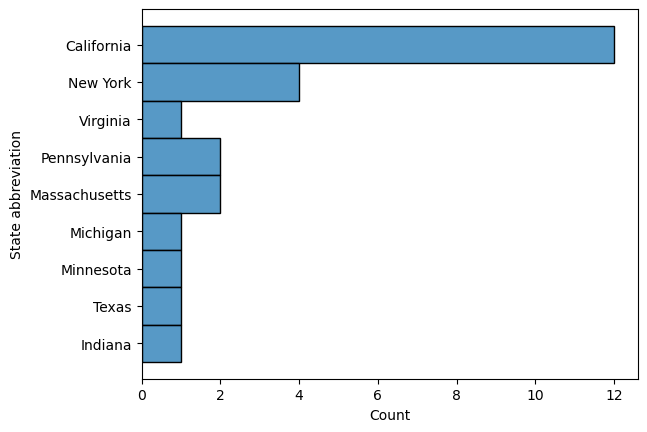

In [110]:
sns.histplot(data=top_50.head(25), y = 'State abbreviation')

#### If we look in the most applied to universities we'll see that it correlates with the highest populated areas but the preffered universities show less correlation.

## Q7: Do students prefer a university because it belongs to a state with a high GDP per capita?

#### Adding GDP per capita feature to the data

In [114]:
GDP = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP')[0]
GDP

State or federal district  \
   State or federal district   
0                        NaN   
1               California *   
2                    Texas *   
3                 New York *   
4                  Florida *   
5                 Illinois *   
6             Pennsylvania *   
7                     Ohio *   
8                  Georgia *   
9               New Jersey *   
10          North Carolina *   
11              Washington *   
12           Massachusetts *   
13                Virginia *   
14                Michigan *   
15                Colorado *   
16               Tennessee *   
17                Maryland *   
18                 Arizona *   
19                 Indiana *   
20               Minnesota *   
21               Wisconsin *   
22                Missouri *   
23             Connecticut *   
24                  Oregon *   
25          South Carolina *   
26               Louisiana *   
27                 Alabama *   
28                Kentucky *   
29                    Utah *   
30                Oklahoma *   
31                    Iowa *   
32                  Nevada *   
33                  Kansas *   
34                Arkansas *   
35                Nebraska *   
36     District of Columbia*   
37             Mississippi *   
38              New Mexico *   
39                   Idaho *   
40           New Hampshire *   
41                  Hawaii *   
42           West Virginia *   
43                Delaware *   
44                   Maine *   
45            North Dakota *   
46            Rhode Island *   
47            South Dakota *   
48                 Montana *   
49                  Alaska *   
50                 Wyoming *   
51                 Vermont *   
52           United States *   

   Nominal GDPat current prices 2022(millions ofU.S. dollars)[1]              \
                                                              q3          q2   
0                                                 NaN                    NaN   
1                                           3634821.0              3558512.0   
2                                           2402237.0              2354455.0   
3                                           2070558.0              2034912.0   
4                                           1403241.0              1371468.0   
5                                           1041663.0              1024019.0   
6                                            931717.0               915424.0   
7                                            829594.0               817627.0   
8                                            762096.0               747535.0   
9                                            753042.0               737654.0   
10                                           735924.0               723163.0   
11                                           731691.0               717336.0   
12                                           693131.0               679122.0   
13                                           654573.0               642755.0   
14                                           626680.0               615408.0   
15                                           489340.0               480828.0   
16                                           480050.0               469938.0   
17                                           474424.0               465635.0   
18                                           463654.0               453602.0   
19                                           458796.0               452422.0   
20                                           450743.0               442528.0   
21                                           404704.0               398850.0   
22                                           392935.0               386397.0   
23                                           323825.0               317907.0   
24                                           301689.0               294325.0   
25                                           298961.0               292932.0   
26

In [115]:
GDP = GDP.iloc[:,[0,6]]
GDP

,State or federal district,Nominal GDP per capita 2022[1][3]
,State or federal district,q3
0,NaN,NaN
1,California *,"$93,130"
2,Texas *,"$79,995"
3,New York *,"$105,226"
4,Florida *,"$63,081"
5,Illinois *,"$82,789"
6,Pennsylvania *,"$71,825"
7,Ohio *,"$70,567"
8,Georgia *,"$69,834"


In [118]:
GDP = GDP[1:52]

In [119]:
GDP.columns = ['State', 'GDP per Capita']
GDP

,State,GDP per Capita
1,California *,"$93,130"
2,Texas *,"$79,995"
3,New York *,"$105,226"
4,Florida *,"$63,081"
5,Illinois *,"$82,789"
6,Pennsylvania *,"$71,825"
7,Ohio *,"$70,567"
8,Georgia *,"$69,834"
9,New Jersey *,"$81,307"
10,North Carolina *,"$68,784"


In [120]:
GDP['State'] = GDP['State'].apply(lambda x: str(x).strip(' *'))
GDP

C:\Users\Marwan\AppData\Local\Temp\ipykernel_32744\3682959913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP['State'] = GDP['State'].apply(lambda x: str(x).strip(' *'))


,State,GDP per Capita
1,California,"$93,130"
2,Texas,"$79,995"
3,New York,"$105,226"
4,Florida,"$63,081"
5,Illinois,"$82,789"
6,Pennsylvania,"$71,825"
7,Ohio,"$70,567"
8,Georgia,"$69,834"
9,New Jersey,"$81,307"
10,North Carolina,"$68,784"


In [123]:
GDP['GDP per Capita'] = GDP['GDP per Capita'].apply(lambda x: str(x).strip('$'))

In [125]:
GDP['GDP per Capita'] = GDP['GDP per Capita'].apply(lambda x: str(x).replace(',',''))

In [126]:
GDP['GDP per Capita'] = pd.to_numeric(GDP['GDP per Capita'])

In [130]:
sorted_GDP = GDP.sort_values(by= 'GDP per Capita', ascending=False)

Text(0.5, 1.0, 'Highest GDP Per Capita')

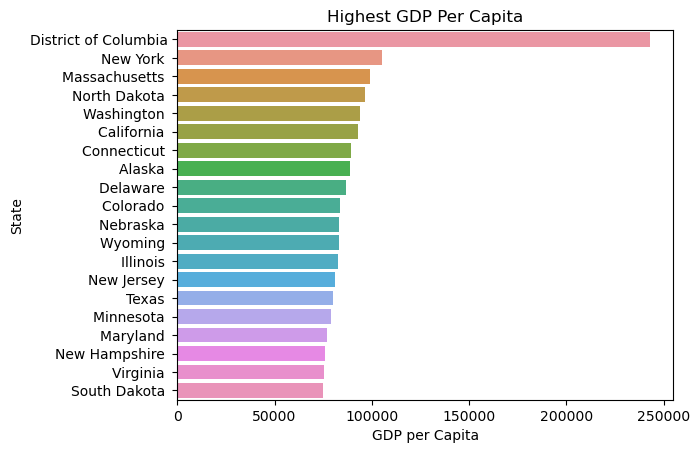

In [131]:
sns.barplot(data=sorted_GDP.head(20),y='State',x='GDP per Capita')
plt.title('Highest GDP Per Capita')

<AxesSubplot:xlabel='Count', ylabel='State abbreviation'>

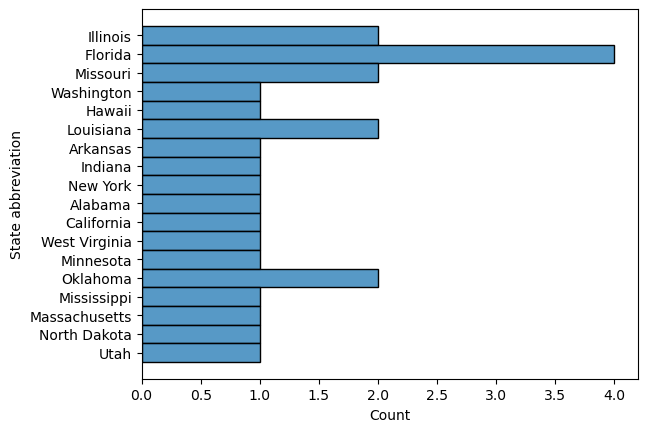

In [132]:
sns.histplot(data=preferred.head(25), y = 'State abbreviation')

#### The two previous plots show that there's generally no correlation between GDP of a state and students' preferrence.

## Q8:Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

<AxesSubplot:xlabel='Admissions yield - total', ylabel='Highest degree offered'>

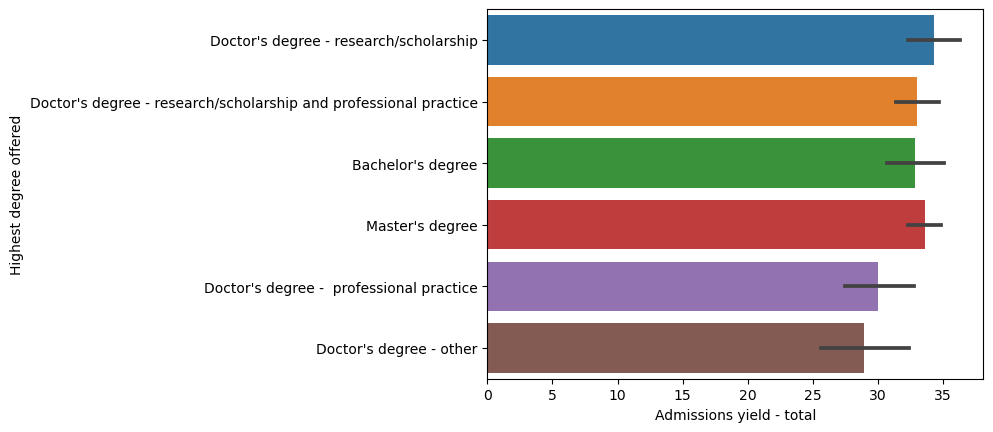

In [135]:
sns.barplot(data=relevant_df, y='Highest degree offered', x='Admissions yield - total')

#### The previous barplot shows generally little to no correlation between the students' preferrence and the universities offering higher academic degrees.